In [2]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [4]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [5]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

In [6]:
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

In [7]:
# Let's build KNN classifier model.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)

[1]


### In the above example, you have given input [0,2], 
### where 0 means Overcast weather and 2 means Mild temperature. 
### Model predicts [1], which means play.

## Using KNN for IRIS Dataset classification

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
import pandas as pd

In [5]:
# loading the dataset
# Importing the dataset
dataset = pd.read_csv('../../../DataSet/iris.csv')

In [6]:
# Dividing data into features and labels
feature_columns = ['sepal.length', 'sepal.width', 'petal.length','petal.width']
X = dataset[feature_columns].values
y = dataset['variety'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [7]:
# Label encoding
# As we can see labels are categorical. KNeighborsClassifier does not accept string labels. 
# We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, 
# Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# Spliting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski')

In [31]:
# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [33]:
# Performance Evaluation
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

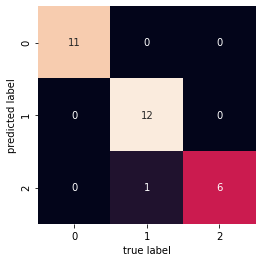

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt 
sn.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [41]:
# calculate the model accuracy
from sklearn.metrics import confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
print(classification_report(y_test, y_pred))

Accuracy of our model is equal 96.67 %.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [37]:
# Using cross-validation for parameter tuning

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

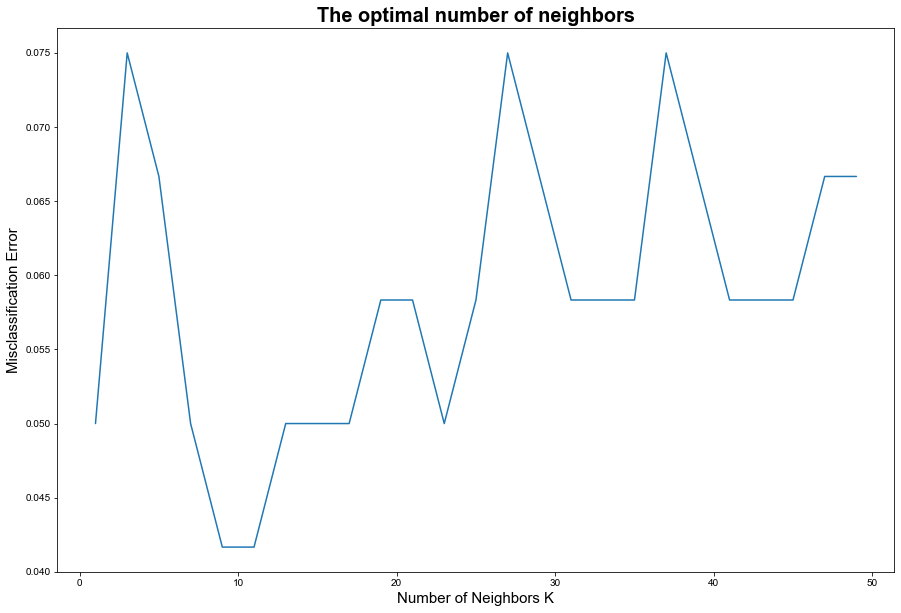

In [39]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sn.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()